## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [322]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [323]:
data = pd.read_csv('german.csv', sep=';')
data = data.dropna()
selected_features = [
    'Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 
    'Length_of_current_employment', 'Sex_Marital_Status', 'Guarantors', 
    'Most_valuable_available_asset', 'No_of_Credits_at_this_Bank'
]

X = data.loc[:, selected_features].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


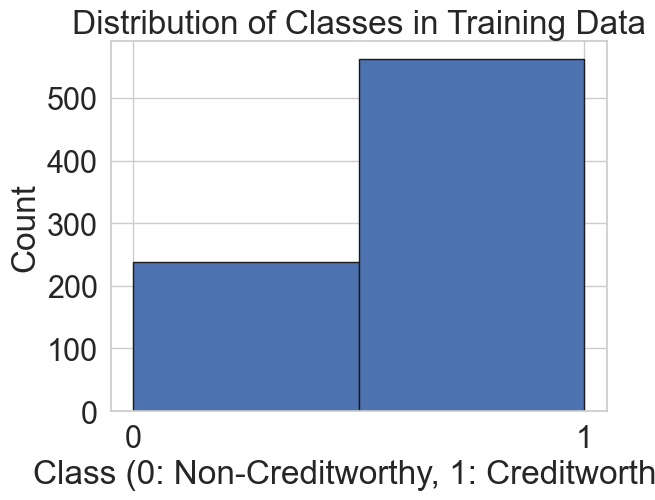

In [324]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

# Обучение Random Forest
rf_model = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced',
    criterion='log_loss',
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=18,
    n_estimators=236,
    random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_prob)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(
    criterion='squared_error',
    learning_rate=0.1,
    max_depth=1,
    max_features='log2',
    min_samples_leaf=32,
    min_samples_split=18,
    min_weight_fraction_leaf=0.05,
    n_estimators=126,
    random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test_scaled)
gb_pred_prob = gb_model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_prob)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.80
Accuracy: 0.75
Precision: 0.87
Recall: 0.75

Gradient Boosting метрики:
ROC AUC: 0.80
Accuracy: 0.75
Precision: 0.76
Recall: 0.93


In [391]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(
    activation='identity',
    hidden_layer_sizes=166,
    learning_rate='invscaling',
    max_fun=30000,
    max_iter=168,
    solver='lbfgs',
    random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_pred_prob = gb_model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_prob)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.4f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.7977
Accuracy: 0.76
Precision: 0.77
Recall: 0.92


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

Произвел масштабирование данных с помощью StandartScaller().

## Random Forest

Подберем параметры для оптимизации гиперпараметров при помощи алгоритма RandomizedSearchCV:

In [328]:
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 300, num = 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
criterion = ['gini', 'entropy', 'log_loss']
class_weight = ['balanced', 'balanced_subsample']
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'class_weight': class_weight,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf_model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

# {'n_estimators': 236,
#  'min_samples_split': 28,
#  'min_samples_leaf': 7,
#  'max_features': 'log2',
#  'max_depth': 9,
#  'criterion': 'log_loss',
#  'class_weight': 'balanced',
#  'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

{'n_estimators': 236,
 'min_samples_split': 28,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'log_loss',
 'class_weight': 'balanced',
 'bootstrap': True}

Проверим кадр данных

In [311]:

rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,mean_test_score,rank_test_score
0,236,28,7,log2,9,log_loss,balanced,True,0.717477,1
1,284,18,7,sqrt,9,entropy,balanced_subsample,True,0.714985,2
2,157,28,2,sqrt,12,log_loss,balanced_subsample,True,0.714976,3
3,173,34,2,sqrt,13,gini,balanced_subsample,True,0.712479,4
4,31,18,2,sqrt,7,entropy,balanced_subsample,True,0.711244,5
5,157,23,7,log2,6,log_loss,balanced_subsample,True,0.709968,6
6,189,28,2,sqrt,15,log_loss,balanced,False,0.708733,7
7,110,28,2,sqrt,7,entropy,balanced,True,0.707476,8
8,300,50,2,sqrt,7,log_loss,balanced,True,0.706218,9
9,63,23,2,sqrt,5,log_loss,balanced,True,0.706204,10


Визуализируем данные

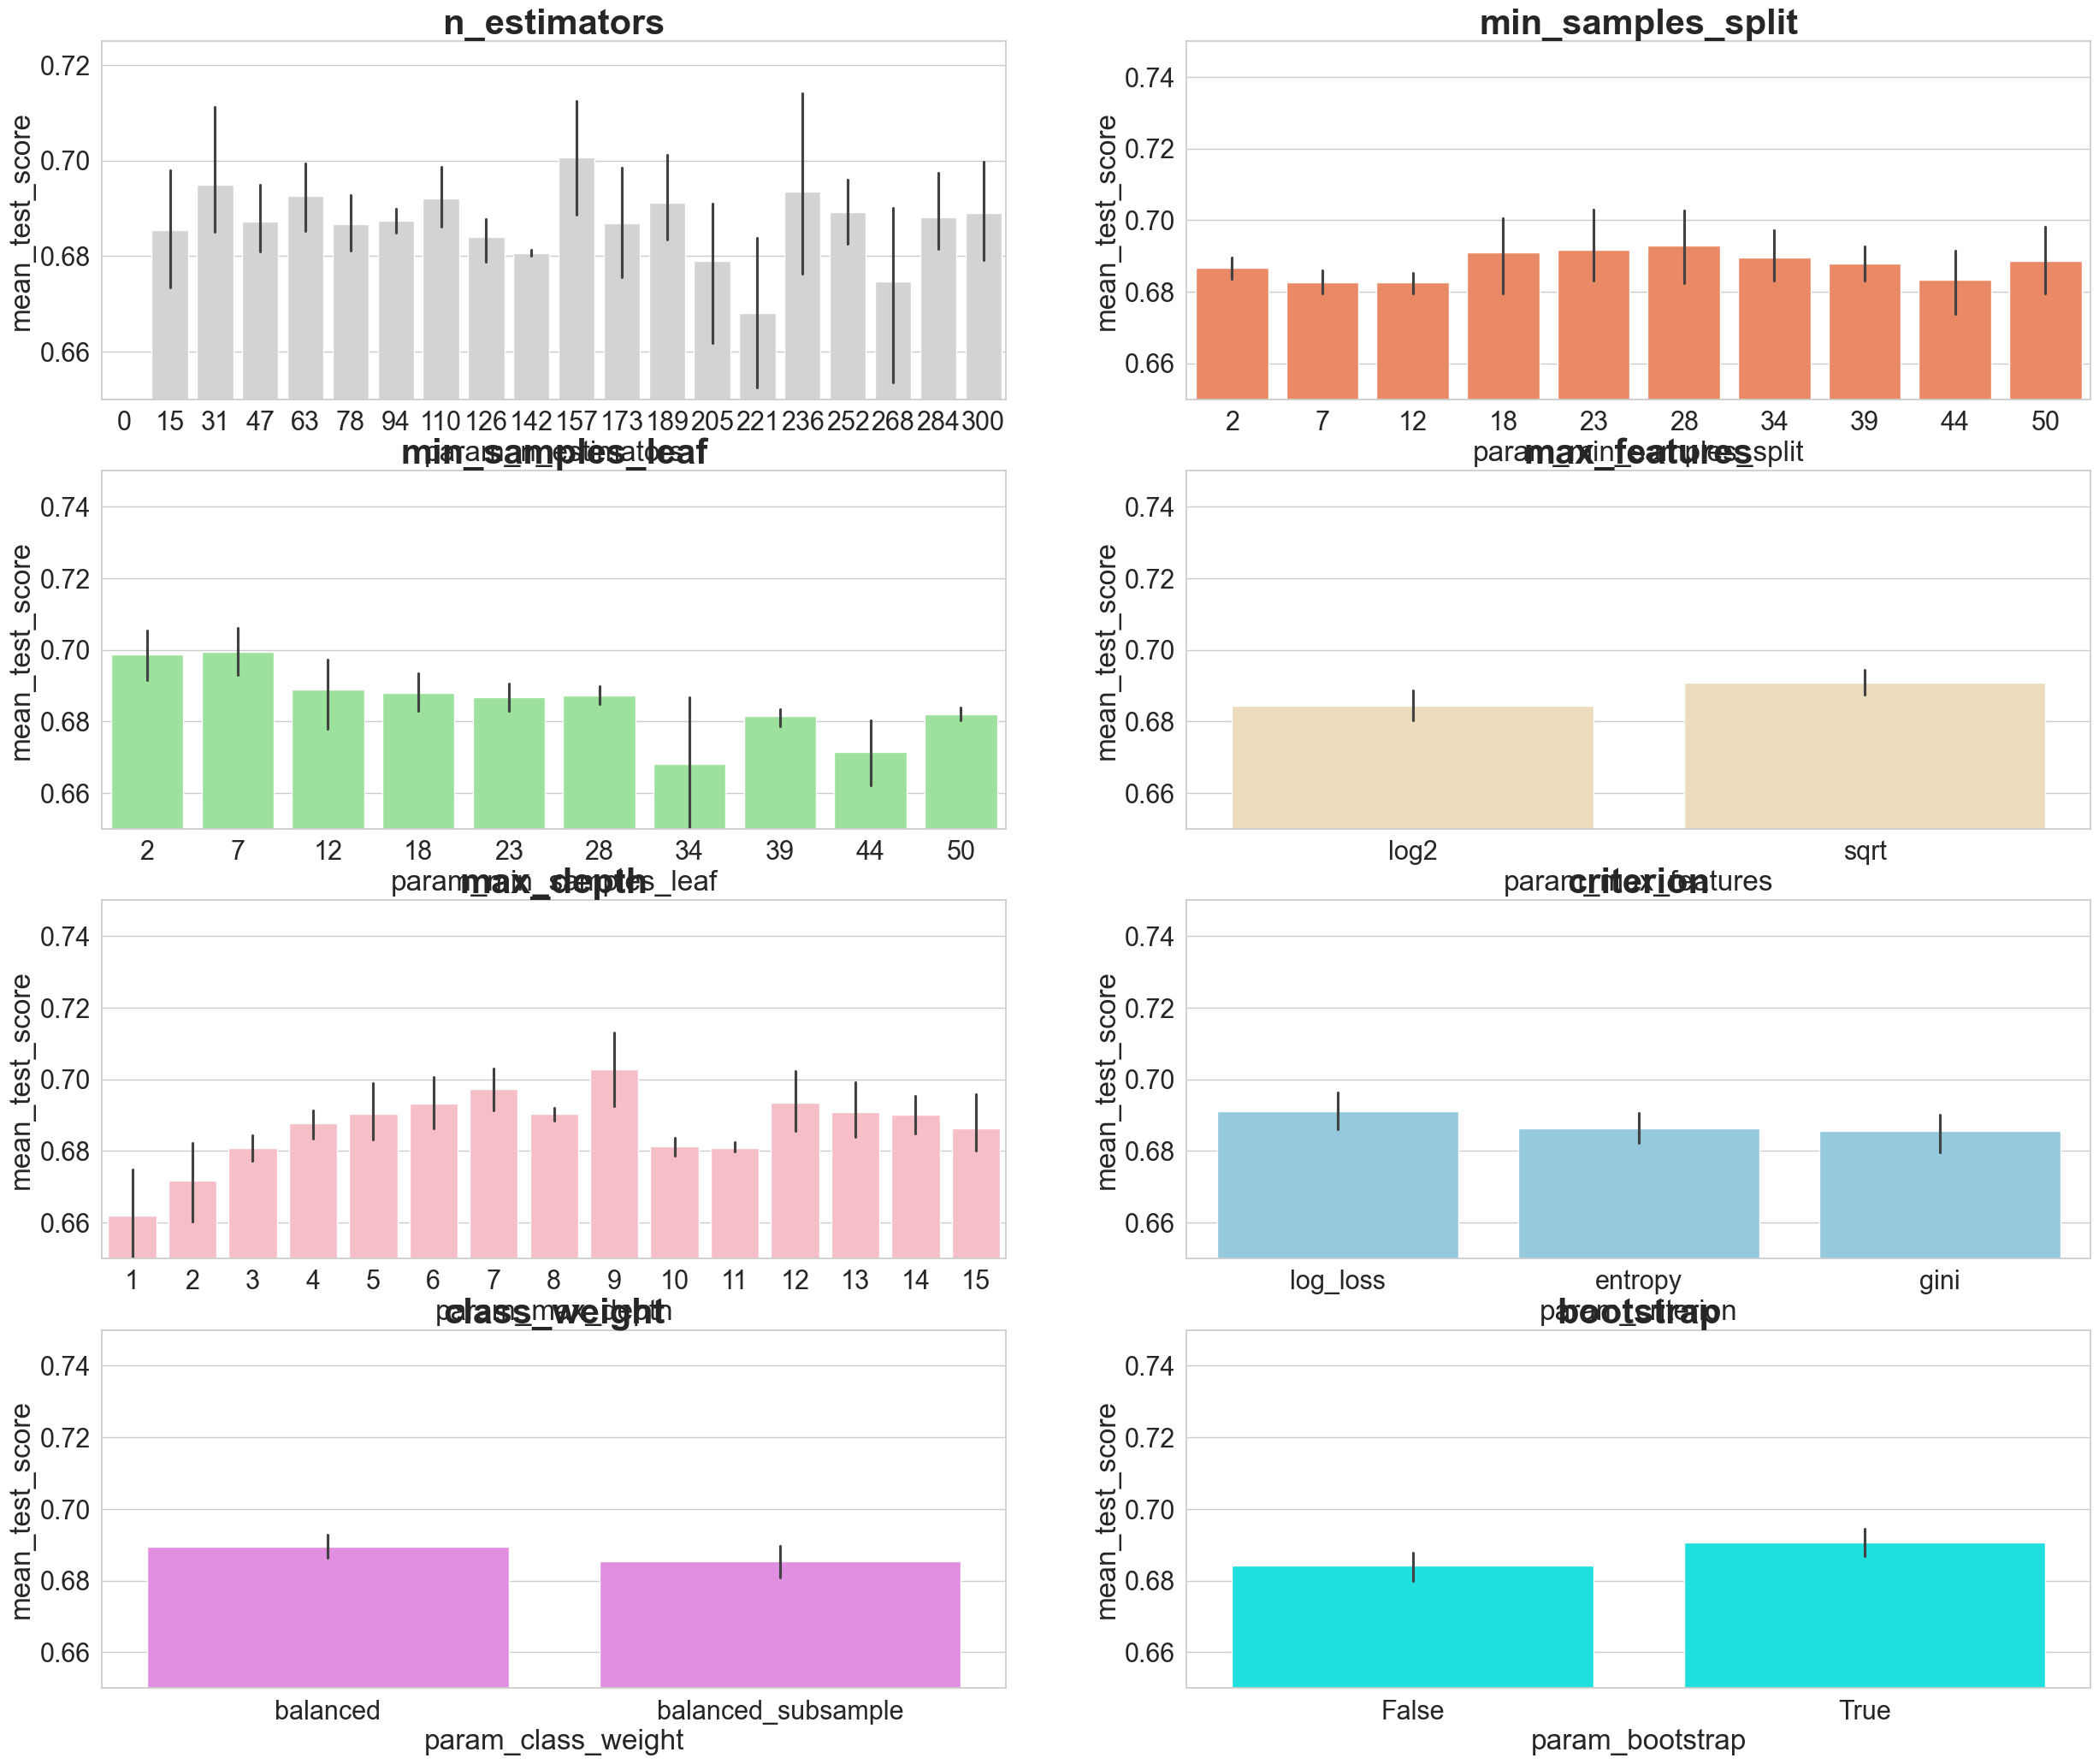

In [246]:
fig, axs = plt.subplots(ncols=2, nrows=4)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.65,.725])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.65,.75])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[1,0], color='lightgreen')
axs[1,0].set_ylim([.65,.75])
axs[1,0].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,1], color='wheat')
axs[1,1].set_ylim([.65,.75])
axs[1,1].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[2,0], color='lightpink')
axs[2,0].set_ylim([.65,.75])
axs[2,0].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_df, ax=axs[2,1], color='skyblue')
axs[2,1].set_ylim([.65,.75])
axs[2,1].set_title(label = 'criterion', size=30, weight='bold')
sns.barplot(x='param_class_weight',y='mean_test_score', data=rs_df, ax=axs[3,0], color='violet')
axs[3,0].set_ylim([.65,.75])
axs[3,0].set_title(label = 'class_weight', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[3,1], color='cyan')
axs[3,1].set_ylim([.65,.75])
axs[3,1].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

### Выберем данные, с которыми мы достигли лучших показателей:
n_estimators = [157,236,31]
max_features = ['sqrt']
max_depth = [7,9]
min_samples_split = [18,23,28]
min_samples_leaf = [2,3,4,5,6,7]
criterion = ['log_loss']
class_weight = ['balanced']
bootstrap = [True]

Применим GridSearchCV

In [329]:
n_estimators = [157,236,31]
max_features = ['sqrt']
max_depth = [7,9]
min_samples_split = [18,23,28]
min_samples_leaf = [2,3,4,5,6,7]
criterion = ['log_loss']
class_weight = ['balanced']
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'class_weight': class_weight,
               'bootstrap': bootstrap}
gs = GridSearchCV(rf_model, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled, y_train)
rf_model_2 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 18,
 'n_estimators': 236}

Мы получили следующие данные параметров,  с которыми попробуем обучить модель:
{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 18,
 'n_estimators': 236}

Удалось получить ROC AUC 0.8

## Gradient Boosting

Подберем параметры для оптимизации гиперпараметров при помощи алгоритма RandomizedSearchCV:

In [ ]:
learning_rate = [float(x) for x in np.linspace(start = 0.05, stop = 0.15, num = 5)]
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 300, num = 20)]
criterion = ['friedman_mse', 'squared_error']
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_weight_fraction_leaf = [float(x) for x in np.linspace(start = 0.05, stop = 0.2, num = 5)]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
param_dist = {'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf': min_weight_fraction_leaf,
                'max_depth': max_depth,
                'max_features': max_features}
rs = RandomizedSearchCV(gb_model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

# {'n_estimators': 142,
#  'min_weight_fraction_leaf': 0.05,
#  'min_samples_split': 12,
#  'min_samples_leaf': 34,
#  'max_features': 'sqrt',
#  'max_depth': 4,
#  'learning_rate': 0.075,
#  'criterion': 'friedman_mse'}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

{'n_estimators': 142,
 'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 12,
 'min_samples_leaf': 34,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.075,
 'criterion': 'friedman_mse'}

Проверяем кадр данных

In [357]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_weight_fraction_leaf,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,param_criterion,mean_test_score,rank_test_score
0,142,0.0500,12,34,sqrt,4,0.075,friedman_mse,0.755005,1
1,268,0.0875,39,2,log2,1,0.050,friedman_mse,0.747501,2
2,110,0.0500,7,34,log2,3,0.050,friedman_mse,0.747496,3
3,189,0.0500,18,34,sqrt,6,0.100,squared_error,0.746257,4
4,126,0.0875,39,28,sqrt,1,0.150,squared_error,0.744999,5
5,126,0.0500,28,50,log2,12,0.100,friedman_mse,0.742526,6
6,142,0.0875,2,23,sqrt,1,0.150,squared_error,0.742498,7
7,94,0.1625,28,18,sqrt,8,0.100,squared_error,0.739991,8
8,94,0.0500,44,34,log2,5,0.100,squared_error,0.739987,9
9,63,0.0875,34,34,log2,9,0.100,squared_error,0.739987,9


Визуализируем

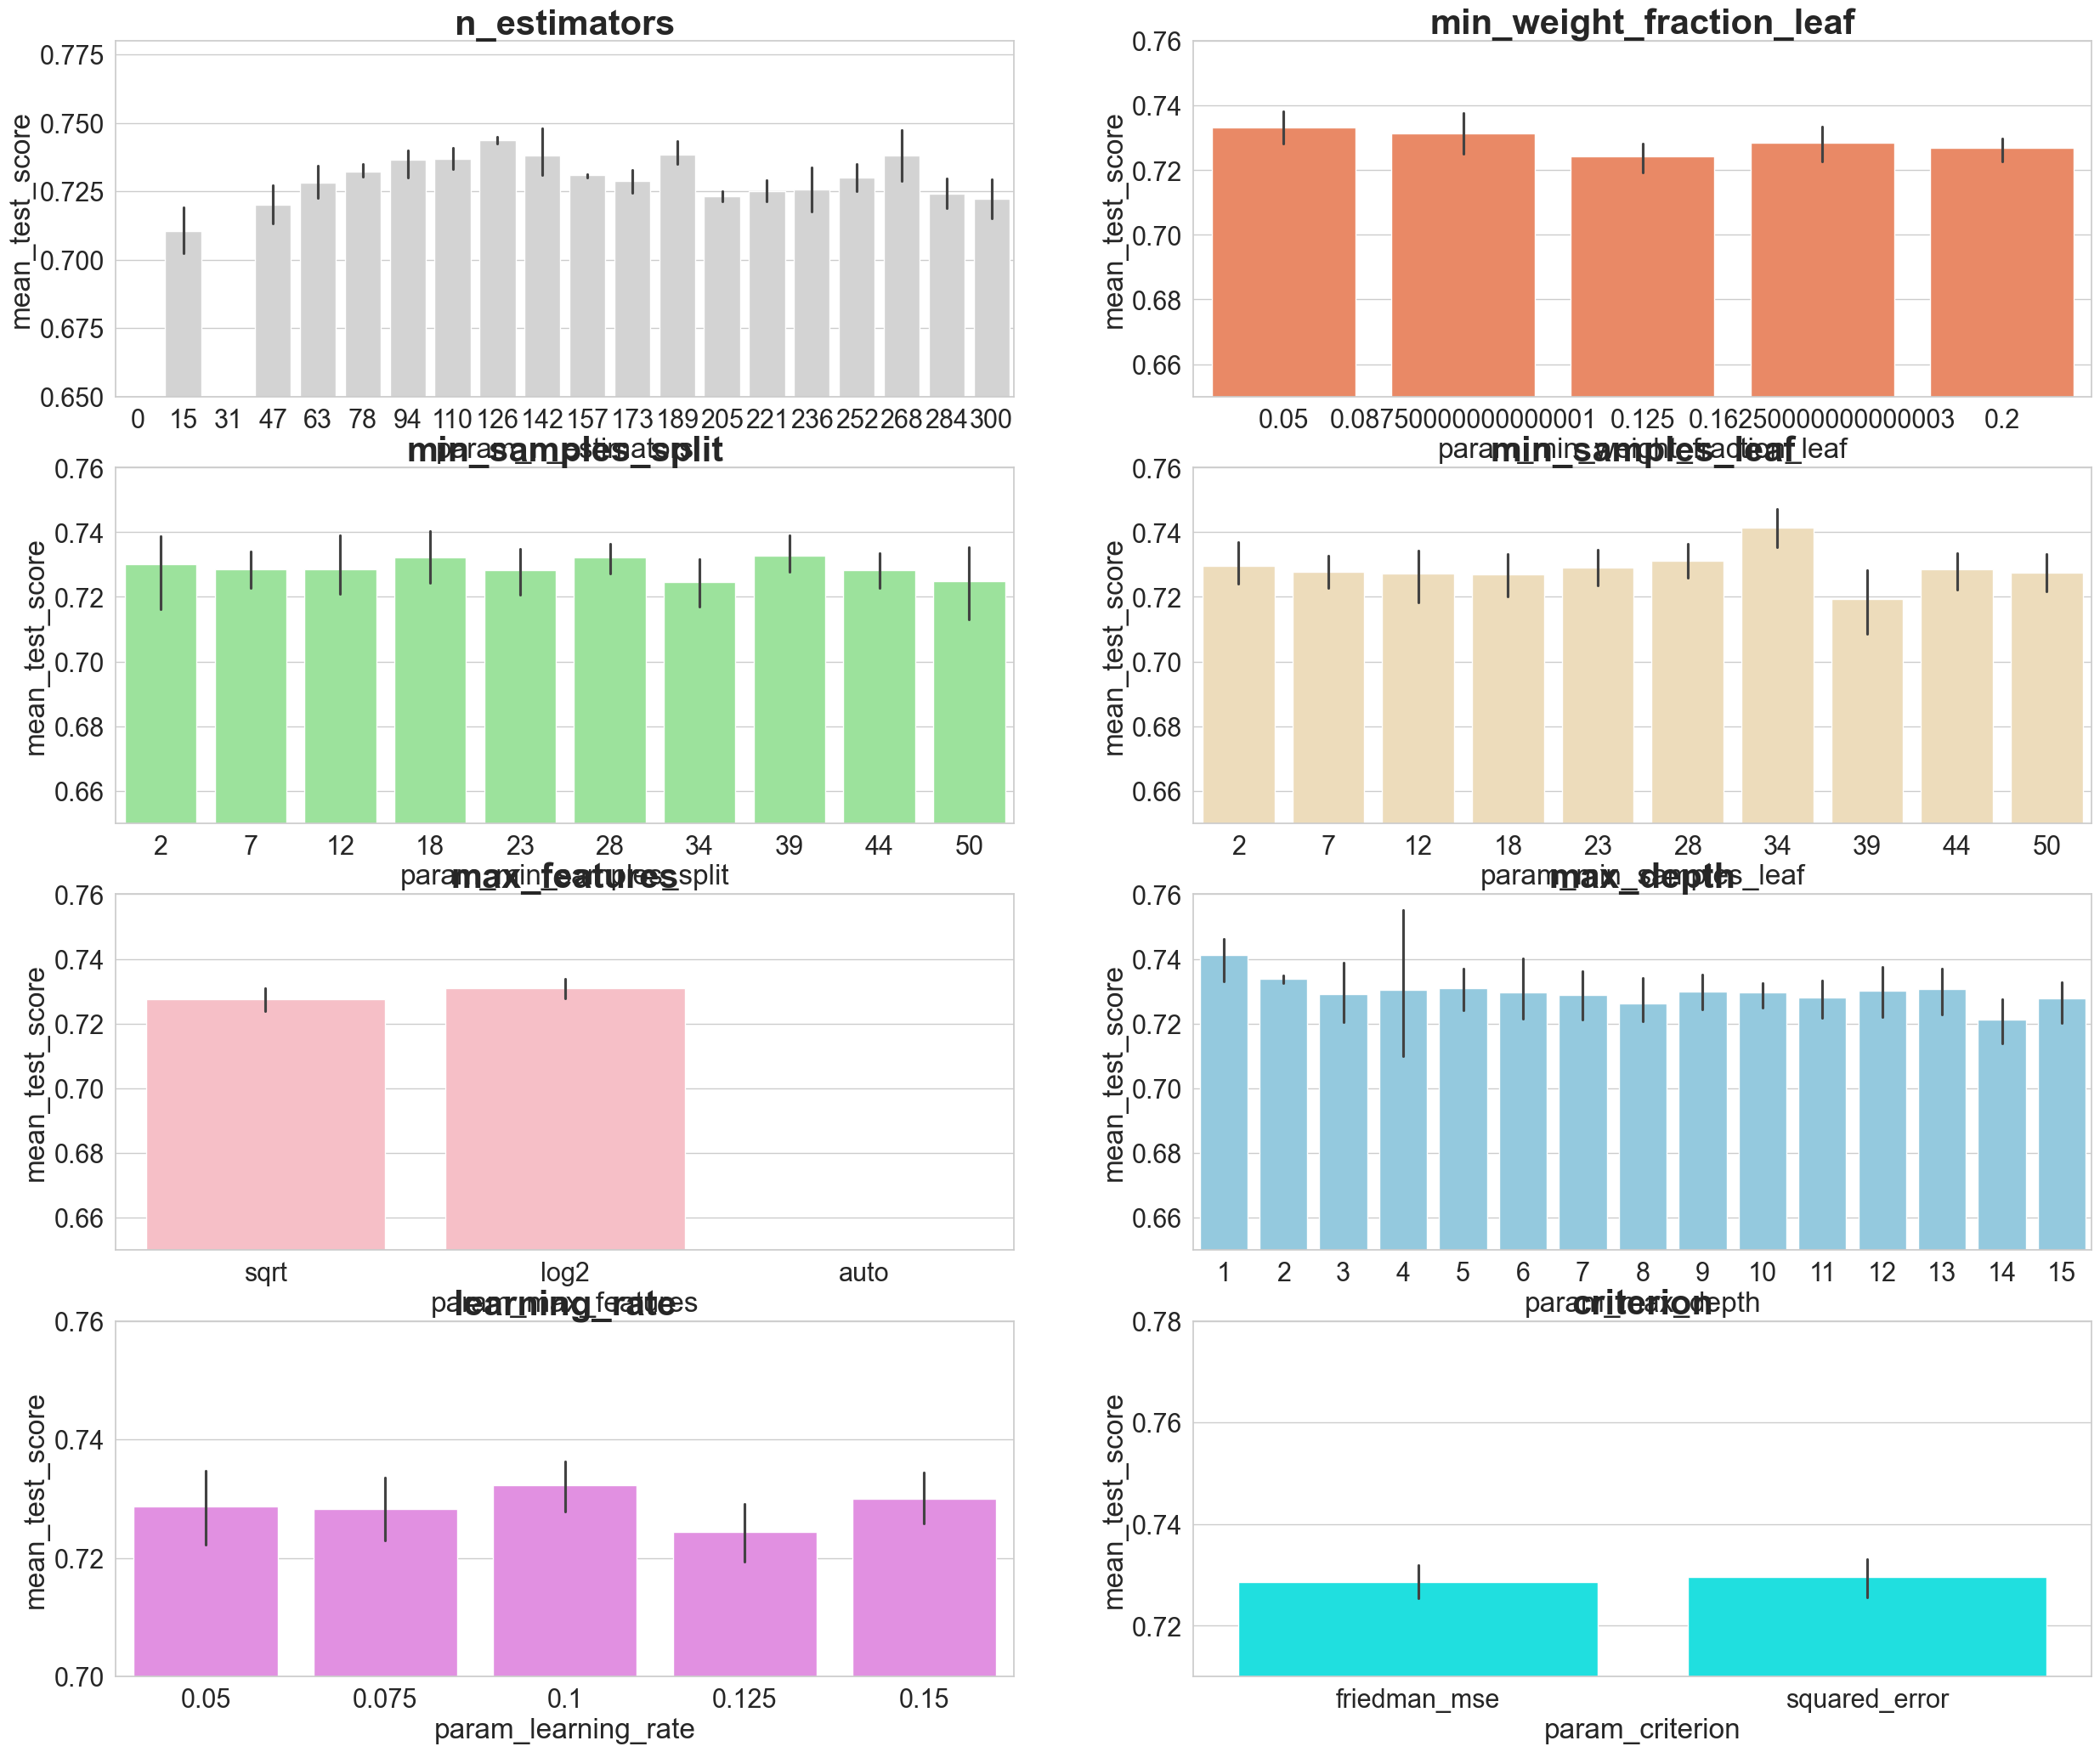

In [358]:
fig, axs = plt.subplots(ncols=2, nrows=4)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.65,.78])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_weight_fraction_leaf', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.65,.76])
axs[0,1].set_title(label = 'min_weight_fraction_leaf', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[1,0], color='lightgreen')
axs[1,0].set_ylim([.65,.76])
axs[1,0].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[1,1], color='wheat')
axs[1,1].set_ylim([.65,.76])
axs[1,1].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[2,0], color='lightpink')
axs[2,0].set_ylim([.65,.76])
axs[2,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth',y='mean_test_score', data=rs_df, ax=axs[2,1], color='skyblue')
axs[2,1].set_ylim([.65,.76])
axs[2,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_learning_rate',y='mean_test_score', data=rs_df, ax=axs[3,0], color='violet')
axs[3,0].set_ylim([.7,.76])
axs[3,0].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_df, ax=axs[3,1], color='cyan')
axs[3,1].set_ylim([.71,.78])
axs[3,1].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

Отбираем параметры для алгоритма GridSearchCV

In [359]:
learning_rate = [0.1, 0,15]
n_estimators = [126,142,268]
criterion = ['squared_error']
min_samples_split = [18,28,39]
min_samples_leaf = [28,29,30,31,32,33,34]
min_weight_fraction_leaf = [0.05, 0.0875, 0.1625]
max_depth = [1,4,13]
max_features = ['log2']
param_grid = {'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf': min_weight_fraction_leaf,
                'max_depth': max_depth,
                'max_features': max_features}
gs = GridSearchCV(gb_model, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled, y_train)
rf_model_2 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 1701 candidates, totalling 5103 fits


{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 32,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.05,
 'n_estimators': 126}

Мы получили следующие данные параметров,  с которыми попробуем обучить модель:

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 32,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.05,
 'n_estimators': 126}
 
 Удалось получить ROC AUC 0.8

## Multi-Layer Perceptron

Подберем параметры для оптимизации гиперпараметров при помощи алгоритма RandomizedSearchCV:

In [ ]:
hidden_layer_sizes = [int(x) for x in np.linspace(start = 0, stop = 300, num = 10)]
activation = ['relu', 'identity', 'logistic', 'tanh']
solver = ['lbfgs']
learning_rate = ['constant', 'invscaling']
max_iter = [int(x) for x in np.linspace(start = 0, stop = 800, num = 20)]
max_fun = [int(x) for x in np.linspace(start = 5000, stop = 40000, num = 8)]

param_dist = {'hidden_layer_sizes': hidden_layer_sizes,
              'activation': activation,
              'solver': solver,
              'learning_rate': learning_rate,
              'max_iter': max_iter,
              'max_fun': max_fun
              }
rs = RandomizedSearchCV(mlp_model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

# {'solver': 'lbfgs',
#  'max_iter': 800,
#  'max_fun': 15000,
#  'learning_rate': 'constant',
#  'hidden_layer_sizes': 166,
#  'activation': 'identity'}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

{'solver': 'lbfgs',
 'max_iter': 800,
 'max_fun': 15000,
 'learning_rate': 'constant',
 'hidden_layer_sizes': 166,
 'activation': 'identity'}

Проверяем кадр данных:

In [377]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_solver,param_max_iter,param_max_fun,param_learning_rate,param_hidden_layer_sizes,param_activation,mean_test_score,rank_test_score
0,lbfgs,547,15000,invscaling,100,identity,0.744985,1
1,lbfgs,800,15000,constant,166,identity,0.744985,1
2,lbfgs,589,30000,constant,266,identity,0.744985,1
3,lbfgs,673,30000,invscaling,266,identity,0.744985,1
4,lbfgs,505,30000,invscaling,166,identity,0.744985,1
5,lbfgs,463,15000,constant,166,identity,0.744985,1
6,lbfgs,673,35000,constant,300,identity,0.744985,1
7,lbfgs,631,25000,invscaling,133,identity,0.744985,1
8,lbfgs,505,25000,constant,300,identity,0.744985,1
9,lbfgs,42,30000,invscaling,266,identity,0.744985,1


Визуализируем данные:

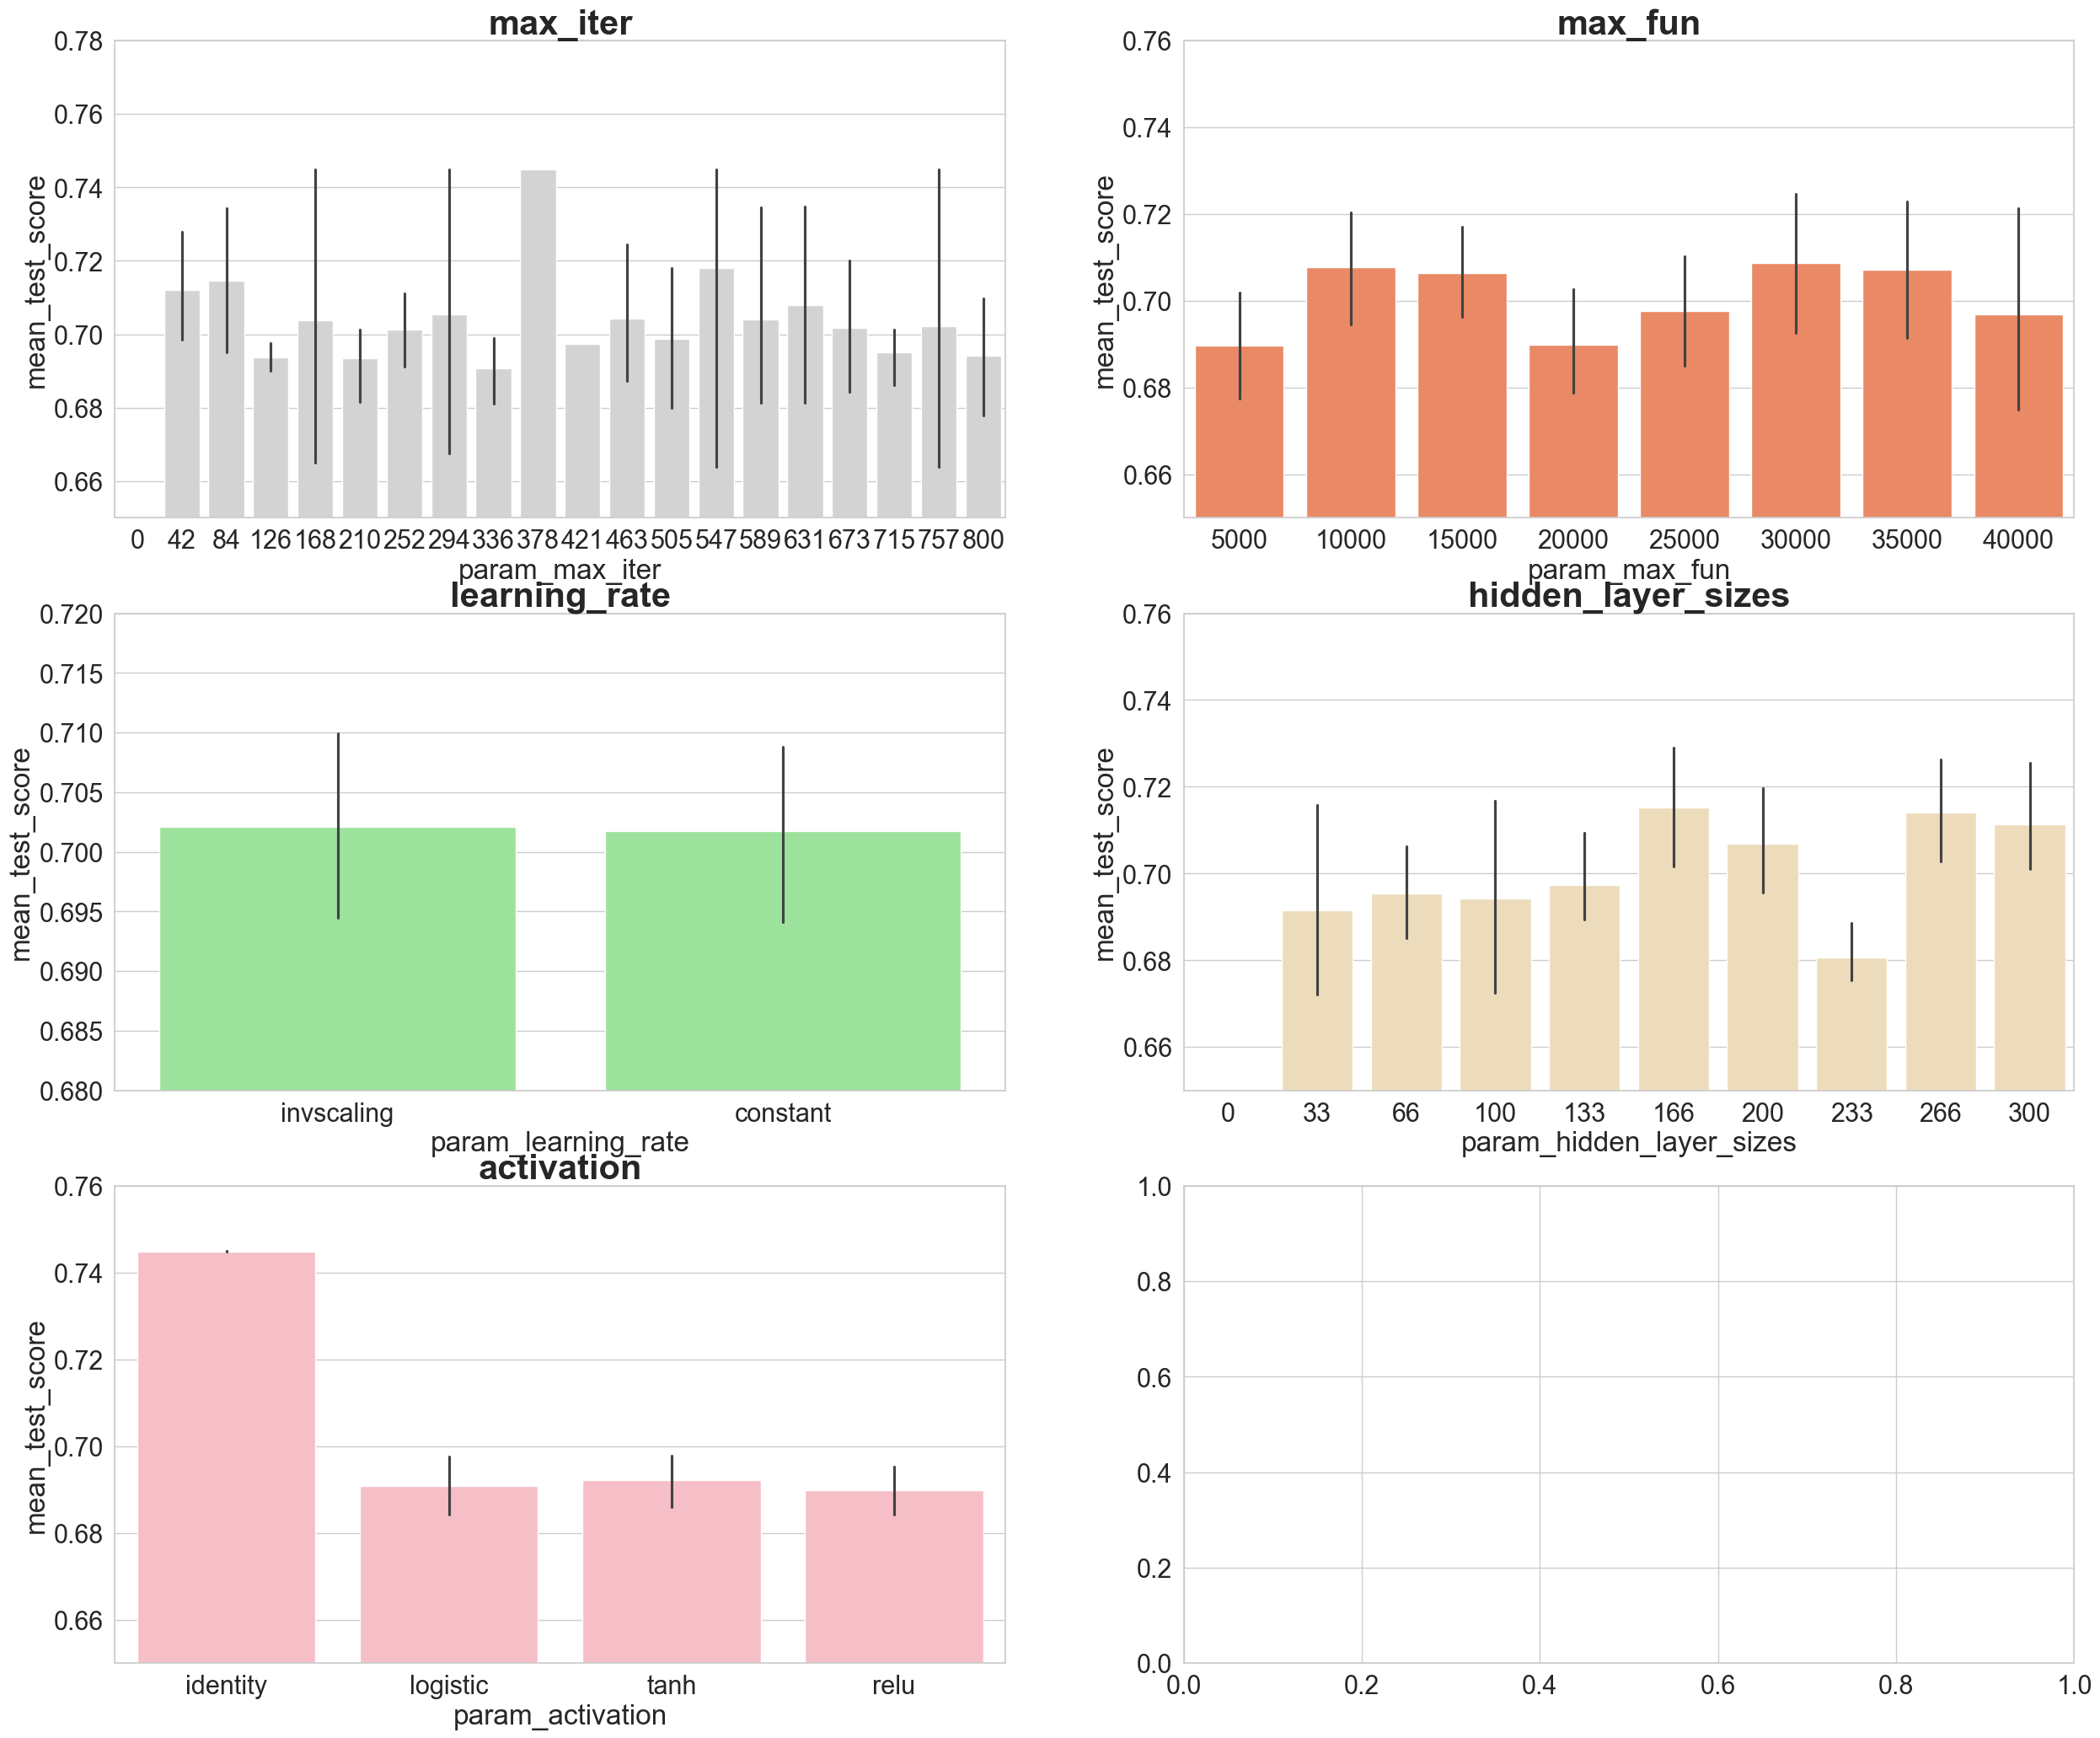

In [379]:
fig, axs = plt.subplots(ncols=2, nrows=3)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_max_iter', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.65,.78])
axs[0,0].set_title(label = 'max_iter', size=30, weight='bold')
sns.barplot(x='param_max_fun', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.65,.76])
axs[0,1].set_title(label = 'max_fun', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=rs_df, ax=axs[1,0], color='lightgreen')
axs[1,0].set_ylim([.68,.72])
axs[1,0].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_hidden_layer_sizes', y='mean_test_score', data=rs_df, ax=axs[1,1], color='wheat')
axs[1,1].set_ylim([.65,.76])
axs[1,1].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
sns.barplot(x='param_activation', y='mean_test_score', data=rs_df, ax=axs[2,0], color='lightpink')
axs[2,0].set_ylim([.65,.76])
axs[2,0].set_title(label = 'activation', size=30, weight='bold')
plt.show()

Отбираем данные для алгоритма GridSearchCV

In [380]:
hidden_layer_sizes = [166,266,300]
activation = ['identity']
solver = ['lbfgs']
learning_rate = ['invscaling']
max_iter = [168]
max_fun = [30000,10000,15000,35000]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes,
              'activation': activation,
              'solver': solver,
              'learning_rate': learning_rate,
              'max_iter': max_iter,
              'max_fun': max_fun
              }

gs = GridSearchCV(mlp_model, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled, y_train)
rf_model_2 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Ruslan\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'activation': 'identity',
 'hidden_layer_sizes': 166,
 'learning_rate': 'invscaling',
 'max_fun': 30000,
 'max_iter': 168,
 'solver': 'lbfgs'}

Мы получили следующие данные параметров,  с которыми попробуем обучить модель:

{'activation': 'identity',
 'hidden_layer_sizes': 166,
 'learning_rate': 'invscaling',
 'max_fun': 30000,
 'max_iter': 168,
 'solver': 'lbfgs'}
 
 Удалось получить ROC AUC 0.8